# **Project VISTAR: Phase 1 - Enrolment Data Analysis**
### **UIDAI Data Hackathon 2025-26**

## Objective
This phase analyzes **Aadhaar Monthly Enrolment Data** to understand how new registrations evolve over time across states.  
The goal is to identify **growth patterns, stability, and volatility** in enrollment activity and establish a baseline for further demographic and mobility analysis.

## Dataset
- **Source:** Aadhaar Monthly Enrolment Data, UIDAI (OGD Platform)
- **Resolution:** Monthly, State-level
- **Content:** First-time Aadhaar issuances by age group

## Method
- Aggregated monthly enrollments at the state level
- Collapsed age groups into:
  - **Dependents (0–17 years)**
  - **Adults (18+ years)**
- Computed the **Child-to-Adult Enrolment Ratio** for comparison across states

## Key Observation
Across all analyzed states and time periods:
- **85–95% of new enrolments belong to the 0–17 age group**
- Adult enrolments remain consistently low
- Demographic composition remains stable regardless of state or time

## Next Step
The analysis therefore pivots to **Aadhaar update datasets**, where adult interaction with the system is more frequent and migration-linked signals are more likely to appear.

# Bihar Enrolment Data(2025-26)

In [27]:
import pandas as pd
df=pd.read_csv('enroll_bihar.csv')
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y',errors='coerce')
df['month']=df['date'].dt.to_period('M')
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-09-01,Bihar,Araria,854318,30,19,0,2025-09
1,2025-09-01,Bihar,Araria,854329,21,2,0,2025-09
2,2025-09-01,Bihar,Araria,854333,17,3,0,2025-09
3,2025-09-01,Bihar,Araria,854334,5,10,0,2025-09
4,2025-09-01,Bihar,Arwal,804401,1,11,0,2025-09


In [38]:

df['month_year'] = df['date'].dt.to_period('M')

monthly_trend = df.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

monthly_trend = monthly_trend.reset_index()

monthly_trend['month_year'] = monthly_trend['month_year'].astype(str)

print(monthly_trend)

  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03      516      1392             444
1    2025-04    12551     15361            1530
2    2025-05    13251     17159            1241
3    2025-06    41380     79893            3736
4    2025-07    19008     38019            2247
5    2025-09    62940     79583            1042
6    2025-10    48051     54773            1735
7    2025-11    47473     56453            1025
8    2025-12    43456     48734             772
9    2026-01    10086     16473             336


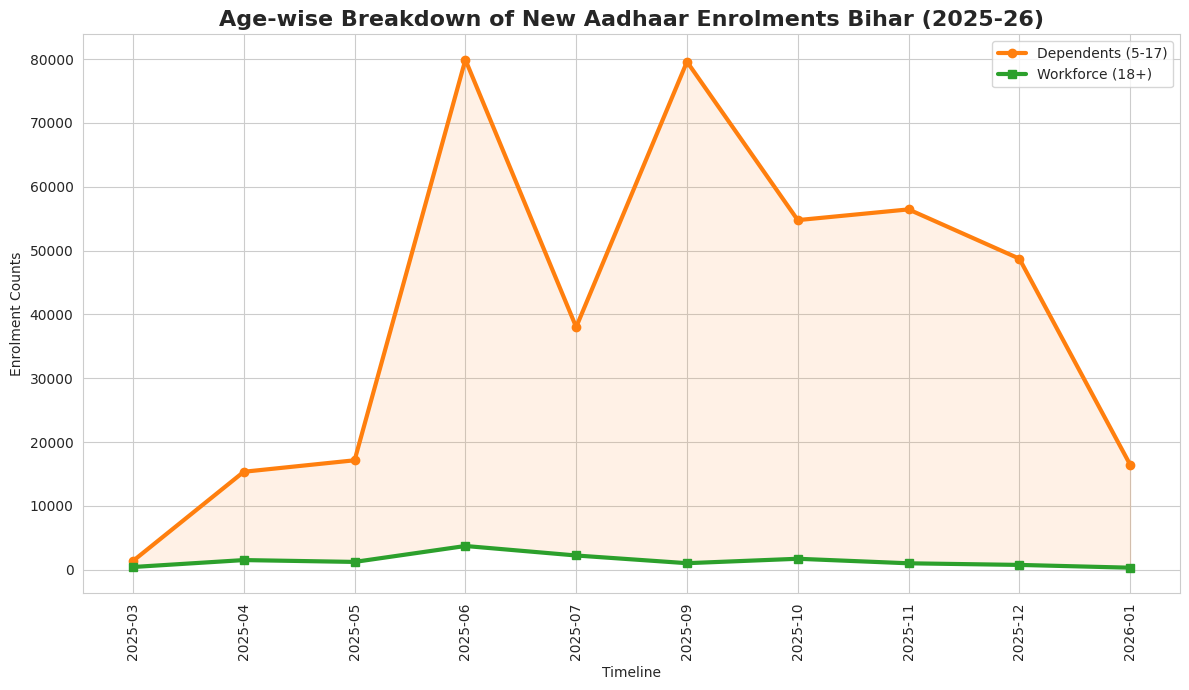

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

df_to_plot = monthly_trend

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(df_to_plot['month_year'], df_to_plot['age_5_17'], marker='o', color='#ff7f0e', linewidth=3, label='Dependents (5-17)')
plt.plot(df_to_plot['month_year'], df_to_plot['age_18_greater'], marker='s', color='#2ca02c', linewidth=3, label='Workforce (18+)')
plt.fill_between(df_to_plot['month_year'], df_to_plot['age_5_17'], df_to_plot['age_18_greater'], color='#ff7f0e', alpha=0.1)

plt.title('Age-wise Breakdown of New Aadhaar Enrolments Bihar (2025-26)', fontsize=16, fontweight='bold')
plt.ylabel('Enrolment Counts')

plt.xlabel('Timeline')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('Bihar_Enrolment_Direct.png', dpi=300)
plt.show()

# Uttar Pradesh Enrolment Data(2025-26)

In [24]:
df1=pd.read_csv('enroll_up.csv')
df1['date']=pd.to_datetime(df1['date'],format='%d-%m-%Y',errors='coerce')
df1['month']=df1['date'].dt.to_period('M')
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-04-01,Uttar Pradesh,Maharajganj,273305,141,176,13,2025-04
1,2025-04-01,Uttar Pradesh,Banda,210001,250,177,30,2025-04
2,2025-04-01,Uttar Pradesh,Lucknow,226005,83,92,23,2025-04
3,2025-04-01,Uttar Pradesh,Kanpur Nagar,208004,73,44,16,2025-04
4,2025-04-01,Uttar Pradesh,Bahraich,271824,68,58,11,2025-04


In [43]:
df1['month_year'] = df1['date'].dt.to_period('M')

monthly_trend1 = df1.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

monthly_trend1 = monthly_trend1.reset_index()

monthly_trend1['month_year'] = monthly_trend1['month_year'].astype(str)

print(monthly_trend1)

  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03     1393      3326             674
1    2025-04    32513     23189            2201
2    2025-05    26928     21554            1379
3    2025-06    55886     86166            3590
4    2025-07    73166     81078            3622
5    2025-09   126150    132594            2335
6    2025-10    68971     63559            2206
7    2025-11   105579     82195            2532
8    2025-12    66630     46026            1497
9    2026-01    20974     21817             797


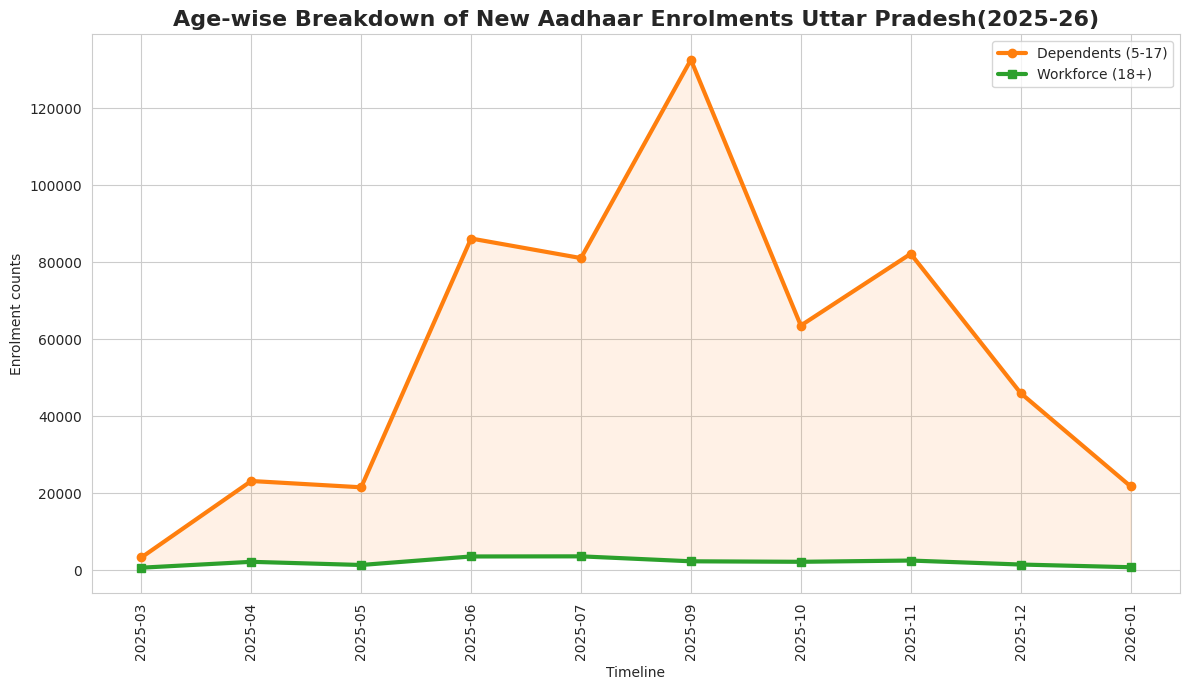

In [64]:
df1_to_plot = monthly_trend1

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(df1_to_plot['month_year'], df1_to_plot['age_5_17'], marker='o', color='#ff7f0e', linewidth=3, label='Dependents (5-17)')
plt.plot(df1_to_plot['month_year'], df1_to_plot['age_18_greater'], marker='s', color='#2ca02c', linewidth=3, label='Workforce (18+)')
plt.fill_between(df_to_plot['month_year'], df1_to_plot['age_5_17'], df1_to_plot['age_18_greater'], color='#ff7f0e', alpha=0.1)

plt.title('Age-wise Breakdown of New Aadhaar Enrolments Uttar Pradesh(2025-26)', fontsize=16, fontweight='bold')
plt.ylabel('Enrolment counts')

plt.xlabel('Timeline')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('UP_Enrolment_Direct.png', dpi=300)
plt.show()

# Maharastra Entrolment Data(2025-26)

In [28]:
df2=pd.read_csv('enroll_mh.csv')
df2['date']=pd.to_datetime(df2['date'],format='%d-%m-%Y',errors='coerce')
df2['month']=df['date'].dt.to_period('M')
df2.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-09-01,Maharashtra,Ahmadnagar,413701,1,2,1,2025-09
1,2025-09-01,Maharashtra,Ahmadnagar,413703,1,1,0,2025-09
2,2025-09-01,Maharashtra,Ahmadnagar,413705,3,0,0,2025-09
3,2025-09-01,Maharashtra,Ahmadnagar,414002,2,1,0,2025-09
4,2025-09-01,Maharashtra,Ahmadnagar,414006,2,0,0,2025-09


In [48]:
df2['month_year'] = df2['date'].dt.to_period('M')

monthly_trend2 = df2.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

monthly_trend2 = monthly_trend2.reset_index()

monthly_trend2['month_year'] = monthly_trend2['month_year'].astype(str)

print(monthly_trend2)

  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03      232       130              98
1    2025-04     7986      1901             704
2    2025-05     6706      2352             791
3    2025-06    39939     23889            1642
4    2025-07    34468     18536            1763
5    2025-09    73837     27751             753
6    2025-10    41660      9151             942
7    2025-11    55794     11366            1719
8    2025-12    50720      6771             815
9    2026-01    16833      4203             471


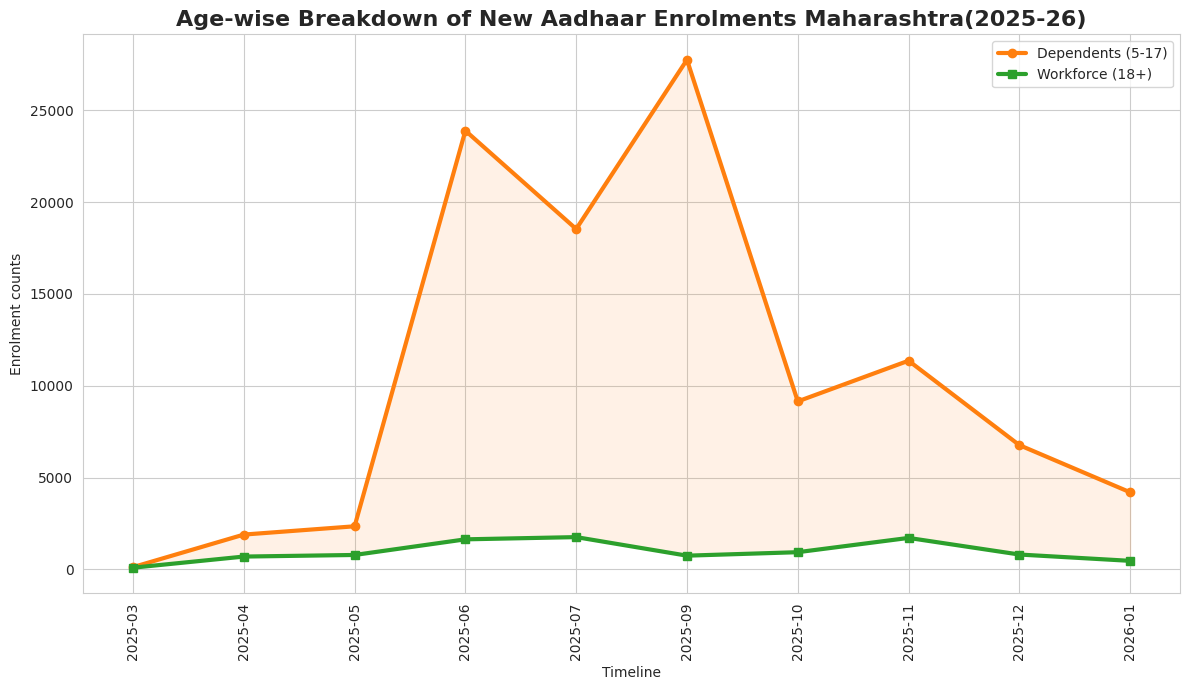

In [65]:
df2_to_plot = monthly_trend2

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(df2_to_plot['month_year'], df2_to_plot['age_5_17'], marker='o', color='#ff7f0e', linewidth=3, label='Dependents (5-17)')
plt.plot(df2_to_plot['month_year'], df2_to_plot['age_18_greater'], marker='s', color='#2ca02c', linewidth=3, label='Workforce (18+)')
plt.fill_between(df2_to_plot['month_year'], df2_to_plot['age_5_17'], df2_to_plot['age_18_greater'], color='#ff7f0e', alpha=0.1)

plt.title('Age-wise Breakdown of New Aadhaar Enrolments Maharashtra(2025-26)', fontsize=16, fontweight='bold')
plt.ylabel('Enrolment counts')

plt.xlabel('Timeline')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('MH_Enrolment_Direct.png', dpi=300)
plt.show()

# Karnataka Enrolment Data(2025-26)

In [50]:
df3=pd.read_csv('enroll_kt.csv')
df3['date']=pd.to_datetime(df3['date'],format='%d-%m-%Y',errors='coerce')
df3['month']=df3['date'].dt.to_period('M')
df3.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-09-01,Karnataka,Bagalkot,587120,4,0,0,2025-09
1,2025-09-01,Karnataka,Bagalkot,587122,4,1,0,2025-09
2,2025-09-01,Karnataka,Bagalkot,587203,8,2,0,2025-09
3,2025-09-01,Karnataka,Bagalkot,587205,2,0,0,2025-09
4,2025-09-01,Karnataka,Bagalkot,587206,6,2,0,2025-09


In [51]:
df3['month_year'] = df3['date'].dt.to_period('M')

monthly_trend3 = df3.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

monthly_trend3 = monthly_trend3.reset_index()

monthly_trend3['month_year'] = monthly_trend3['month_year'].astype(str)

print(monthly_trend3)

  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03      309       192             231
1    2025-04     7326      1165            1095
2    2025-05     2835      1758             898
3    2025-06    33158     15196            3303
4    2025-07     8654      4460            2149
5    2025-09    49282      8066            1025
6    2025-10    31542      4942             800
7    2025-11    39294      5885            1379
8    2025-12    35356      3923             360
9    2026-01    10758      2184             185


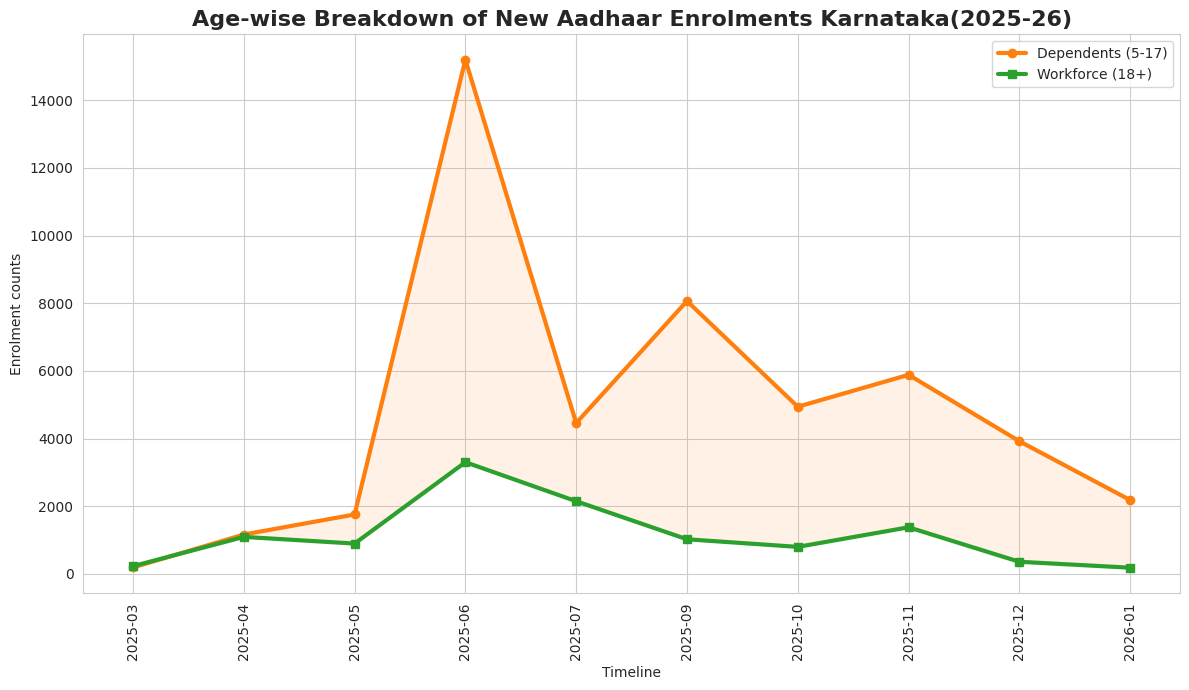

In [66]:
df3_to_plot = monthly_trend3

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(df3_to_plot['month_year'], df3_to_plot['age_5_17'], marker='o', color='#ff7f0e', linewidth=3, label='Dependents (5-17)')
plt.plot(df3_to_plot['month_year'], df3_to_plot['age_18_greater'], marker='s', color='#2ca02c', linewidth=3, label='Workforce (18+)')
plt.fill_between(df3_to_plot['month_year'], df3_to_plot['age_5_17'], df3_to_plot['age_18_greater'], color='#ff7f0e', alpha=0.1)

plt.title('Age-wise Breakdown of New Aadhaar Enrolments Karnataka(2025-26)', fontsize=16, fontweight='bold')
plt.ylabel('Enrolment counts')

plt.xlabel('Timeline')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('KT_Enrolment_Direct.png', dpi=300)
plt.show()

# Madhya Pradesh Enrolment Data(2025-26)

In [58]:
df4=pd.read_csv('enroll_mp.csv')
df4['date']=pd.to_datetime(df4['date'],format='%d-%m-%Y',errors='coerce')
df4['month']=df4['date'].dt.to_period('M')
df4.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-09-01,Madhya Pradesh,Agar Malwa,465447,3,0,0,2025-09
1,2025-09-01,Madhya Pradesh,Alirajpur,457888,7,11,0,2025-09
2,2025-09-01,Madhya Pradesh,Anuppur,484113,1,0,0,2025-09
3,2025-09-01,Madhya Pradesh,Anuppur,484440,1,0,0,2025-09
4,2025-09-01,Madhya Pradesh,Ashok Nagar,473330,19,4,0,2025-09


In [59]:
df4['month_year'] = df4['date'].dt.to_period('M')

monthly_trend4 = df4.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

monthly_trend4 = monthly_trend4.reset_index()

monthly_trend4['month_year'] = monthly_trend4['month_year'].astype(str)

print(monthly_trend4)

  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03      286       161              95
1    2025-04    12077      4146            1128
2    2025-05     7221      3018             364
3    2025-06    38412     35967            1725
4    2025-07    34979     26040            2169
5    2025-09    98016     33562             939
6    2025-10    50763     12016            1287
7    2025-11    83430     16699            1825
8    2025-12    71168     12755            1064
9    2026-01    22039      6855             307


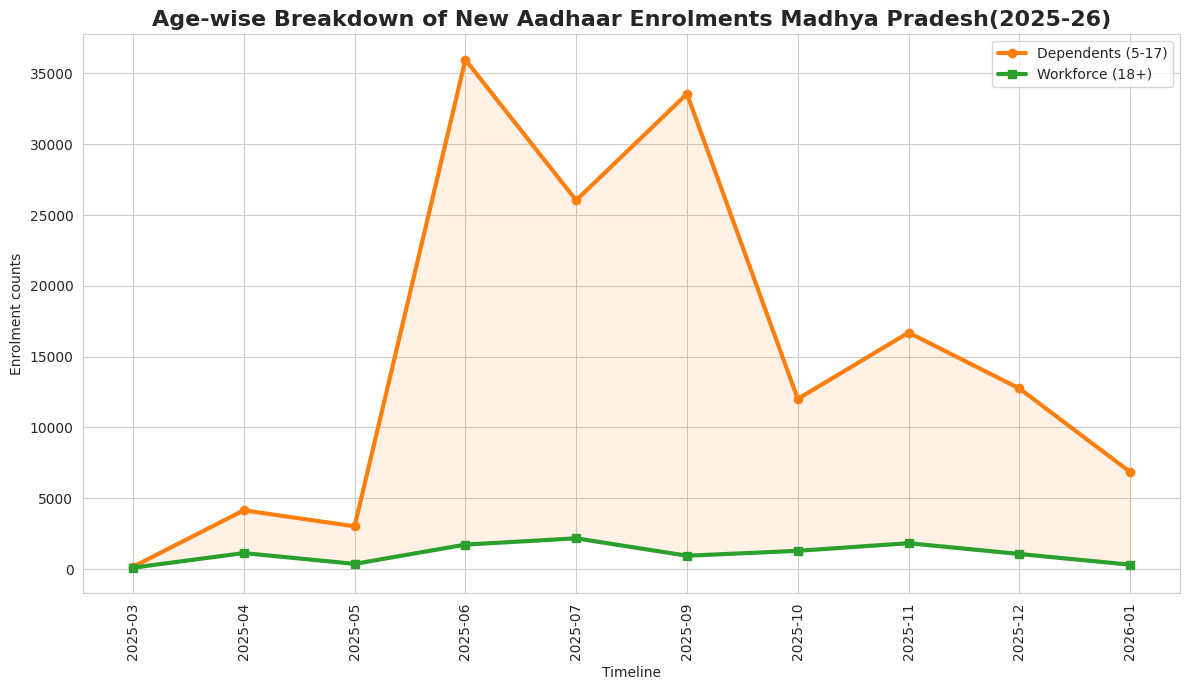

In [67]:
df4_to_plot = monthly_trend4

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(df4_to_plot['month_year'], df4_to_plot['age_5_17'], marker='o', color='#ff7f0e', linewidth=3, label='Dependents (5-17)')
plt.plot(df4_to_plot['month_year'], df4_to_plot['age_18_greater'], marker='s', color='#2ca02c', linewidth=3, label='Workforce (18+)')
plt.fill_between(df4_to_plot['month_year'], df4_to_plot['age_5_17'], df4_to_plot['age_18_greater'], color='#ff7f0e', alpha=0.1)

plt.title('Age-wise Breakdown of New Aadhaar Enrolments Madhya Pradesh(2025-26)', fontsize=16, fontweight='bold')
plt.ylabel('Enrolment counts')

plt.xlabel('Timeline')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('MP_Enrolment_Direct.png', dpi=300)
plt.show()

# Inter-State Comparison

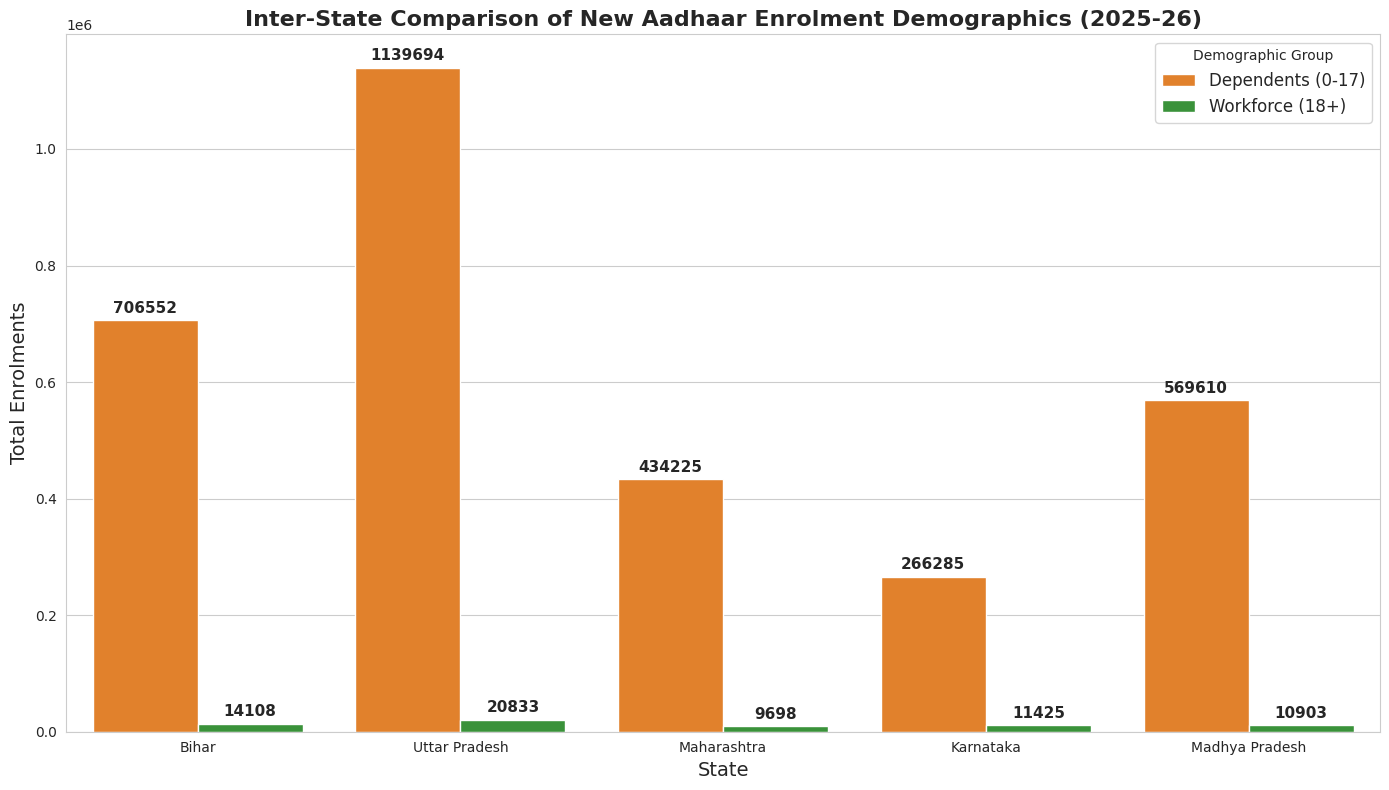

In [68]:
all_states_data = {
    'Bihar': monthly_trend,         # from df
    'Uttar Pradesh': monthly_trend1, # from df1
    'Maharashtra': monthly_trend2,   # from df2
    'Karnataka': monthly_trend3,     # from df3
    'Madhya Pradesh': monthly_trend4 # from df4
}

summary_list = []

for state_name, df_trend in all_states_data.items():

    dependents = df_trend['age_0_5'].sum() + df_trend['age_5_17'].sum()

    workforce = df_trend['age_18_greater'].sum()

    summary_list.append({'State': state_name, 'Category': 'Dependents (0-17)', 'Count': dependents})
    summary_list.append({'State': state_name, 'Category': 'Workforce (18+)', 'Count': workforce})

df_final = pd.DataFrame(summary_list)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")


ax = sns.barplot(
    data=df_final,
    x='State',
    y='Count',
    hue='Category',
    palette={'Dependents (0-17)': '#ff7f0e', 'Workforce (18+)': '#2ca02c'}
)

plt.title('Inter-State Comparison of New Aadhaar Enrolment Demographics (2025-26)', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Enrolments', fontsize=14)
plt.legend(title='Demographic Group', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('Final_Comparison_BarGraph.png', dpi=300)
plt.show()